## Observations and Insights 

The following observations and insights were made following this analysis:

1. While fewer female than male mice were studied (2% difference), this small difference should not indicate that the treatment effectiveness would vary by sex.
2. As mouse weight increased, the average tumor volume increased, indicating that either heavier mice are more prone to larger tumors or that the drugs are less effective in larger mice. Something worth taking a deeper dive into.
3. In the Capomulin example for mouse s185, as the timepoint increased the tumor volue decreased indicating the drug is successful in this mouse.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")

# Display the data table for preview
all_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = len(all_df['Mouse ID'].unique())
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Source: https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicate = all_df[all_df.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Find all indexes for the duplicate mouse. Source: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames = all_df[all_df['Mouse ID'] == "g989"].index
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (Same source as above.)
mice_df = all_df.drop(indexNames , inplace=True)
mice_df = all_df

In [5]:
# Checking the number of mice in the clean DataFrame to confirm the mouse with duplicate data was dropped. 
mice = len(mice_df['Mouse ID'].unique())
mice

248

## Summary Statistics

In [6]:
#Calculate summary statistics
drug_df = mice_df.groupby(['Drug Regimen']).mean()
drug_median = mice_df.groupby(['Drug Regimen']).median()
#variance = np.var(mice_df.groupby['Drug Regimen'],ddof = 0)
drug_df['Median Tumor Volume'] = drug_median['Tumor Volume (mm3)']
#drug_df['Tumor Volume Variance'] = variance['Tumor Volume (mm3)']

drug_df = drug_df[['Tumor Volume (mm3)','Median Tumor Volume']]
drug_df


,Tumor Volume (mm3),Median Tumor Volume
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [7]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# drug_df = drug_df[['Tumor Volume (mm3)','Median Tumor Volume']]
# drug_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: https://stackoverflow.com/questions/57842316/pandas-calculate-variance-from-aggregation

mean = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean":mean,
                              "Median":median,
                              "Variance":variance,
                              "Standard Deviation": std,
                              "SEM": sem
                            
                            })
summary_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_data = mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
summary_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

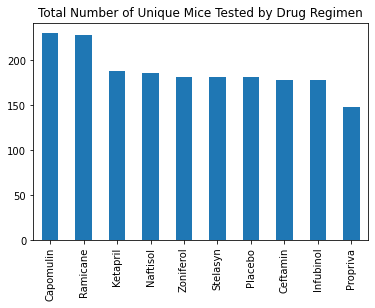

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_drug = pd.DataFrame({
    "Drug Regimen": mice_df['Drug Regimen'],
    "Mice": mice_df['Mouse ID']
})

mice_drug['Drug Regimen'].value_counts()
# Set the index for labels
mice_drug.set_index('Drug Regimen')
mice_drug['Drug Regimen'].value_counts().plot(kind="bar")

# Set a title for the chart
plt.title("Total Number of Unique Mice Tested by Drug Regimen")

plt.show()

In [10]:
mice_drug['Drug Regimen'].value_counts().index

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'],
      dtype='object')

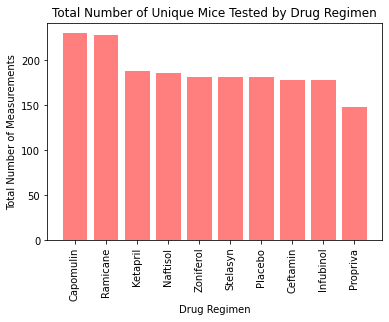

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_drug['Drug Regimen'].value_counts()
tick_locations = [value for value in x_axis]
plt.bar(x_axis.index, x_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Total Number of Unique Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()


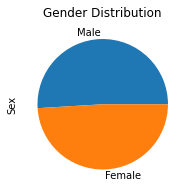

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Creates new data frame
gender_df = mice_df['Sex'].value_counts()

#Plots data
gender_df.plot(kind="pie", figsize=(20,3))

# Set a title for the chart
plt.title("Gender Distribution")

#Display
plt.show()
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x7fa957e42490>,
 [Text(-0.6814042419013431, -0.8635324308437154, 'Male'),
  Text(0.6814042419013431, 0.8635324308437154, 'Female')],
 [Text(-0.3716750410370962, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

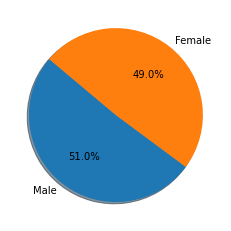

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = mice_df['Sex'].value_counts()
# Labels for the sections of our pie chart
labels = gender_df.index

# The values of each section of the pie chart
sizes = gender_df.values


# Tells matplotlib to seperate the "Humans" section from the others
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_df, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_mouse = mice_df[['Mouse ID', 'Timepoint']].sort_values(by=['Mouse ID', 'Timepoint'])
final_mouse = final_mouse.drop_duplicates(subset=['Mouse ID'], keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint = final_mouse.merge(
    mice_df,
    on='Mouse ID',
    how='inner', 
    sort=False)
timepoint = timepoint.sort_values(by=['Mouse ID', 'Timepoint_x'])
timepoint = timepoint.drop_duplicates(subset=['Mouse ID'], keep='last')

#calculates tumor volume across four specified treatment regimens
tumor_volume = timepoint[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint_x']]
tumor_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint_x
9,a203,Infubinol,67.973419,45
19,a251,Infubinol,65.525743,45
29,a262,Placebo,70.717621,45
39,a275,Ceftamin,62.999356,45
46,a366,Stelasyn,63.440686,30
...,...,...,...,...
1839,z435,Propriva,48.710661,10
1849,z578,Ramicane,30.638696,45
1859,z581,Infubinol,62.754451,45
1869,z795,Naftisol,65.741070,45


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


In [46]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_volume_series = tumor_volume.loc[(tumor_volume['Drug Regimen'] == treatment)]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume_series)
    quartiles = tumor_volume_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_volume_outliers = tumor_volume_series.loc[(tumor_volume_series < lower_bound) | (tumor_volume_series > upper_bound)]
    print(f"{treatment}'s potential outliers: {tumor_volume_outliers}")

    


    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 275    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


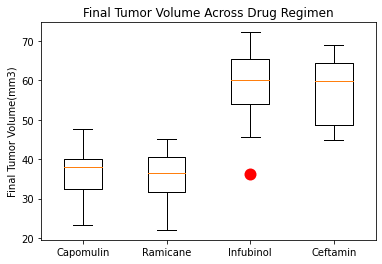

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest. 

flierprops = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='none')
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=flierprops )#.set_title('Final Tumor Volume Across Drug Regimen')
plt.title('Final Tumor Volume Across Drug Regimen')
plt.ylabel('Final Tumor Volume(mm3)')
plt.show()


## Line and Scatter Plots

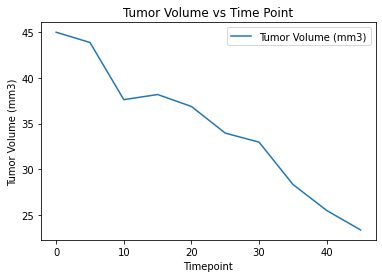

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Get data
capomulin_mouse = mice_df.loc[(mice_df['Drug Regimen'] == "Capomulin") & (mice_df['Mouse ID'] =="s185")]
capomulin_mouse = capomulin_mouse[['Timepoint', 'Tumor Volume (mm3)']]
capomulin_mouse = capomulin_mouse.set_index('Timepoint')
capomulin_mouse

#Generate plot
capomulin_mouse.plot()

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Time Point')
plt.show()

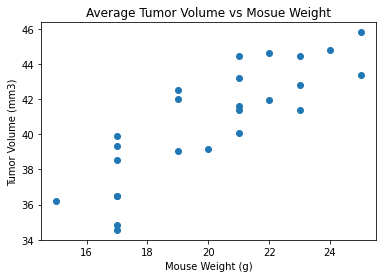

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 
#get data
capomulin = mice_df.loc[(mice_df['Drug Regimen'] == "Capomulin")]
capomulin = capomulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]

capomulin = capomulin.groupby(['Mouse ID']).mean()

#set axes
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']


# Create Plot
plt.scatter(x_values,y_values)

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mosue Weight')
plt.show()


## Correlation and Regression

The r-value is: 0.7088568047708717
The line equation is: y = 0.95x +21.55
The correlation between mouse weight and the average tumor volume is 0.95


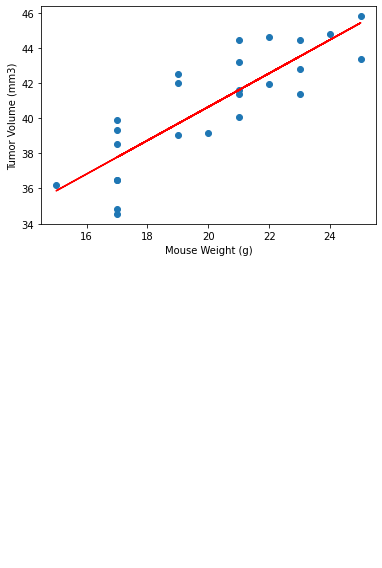

In [135]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Print equation and correlation info
print(f"The line equation is: {line_eq}")
print(f'The correlation between mouse weight and the average tumor volume is {str(round(slope,2))}')
plt.show()

